In [1]:
## Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
## Loading the data
df1=pd.read_csv('bank-full.csv') ## Main Data set
df2=pd.read_csv('bank.csv') ## Sample Data set

In [46]:
df2.job=df2.job.map({'management':11, 'blue-collar':10, 'technician':9, 'admin.':8, 'services': 7, 'retired': 6, 'self-employed':5, 'entrepreneur':4, 'unemployed': 3, 'housemaid': 2, 'student': 1, 'unknown':0 })
df2.marital=df2.marital.map({'married':2, 'single':1,'divorced':0})
df2.education=df2.education.map({'tertiary':3, 'secondary':2 ,'unknown':1 ,'primary':0})
df2.default=df2.default.map({'no':0, 'yes':1})
df2.housing=df2.housing.map({'yes':1, 'no':0})
df2.loan=df2.loan.map({'no':0, 'yes':1})
df2.contact=df2.contact.map({'unknown':2, 'cellular':1 ,'telephone':0})
df2.poutcome=df2.poutcome.map({'unknown':3, 'failure':2, 'other':1, 'success':0})
df2.month=df2.month.map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2, 'mar':3 ,'apr':4, 'sep':9})
df2.y=df2.y.map({'no':0 ,'yes':1})

In [47]:
df1.job=df1.job.map({'management':11, 'blue-collar':10, 'technician':9, 'admin.':8, 'services': 7, 'retired': 6, 'self-employed':5, 'entrepreneur':4, 'unemployed': 3, 'housemaid': 2, 'student': 1, 'unknown':0 })
df1.marital=df1.marital.map({'married':2, 'single':1,'divorced':0})
df1.education=df1.education.map({'tertiary':3, 'secondary':2 ,'unknown':1 ,'primary':0})
df1.default=df1.default.map({'no':0, 'yes':1})
df1.housing=df1.housing.map({'yes':1, 'no':0})
df1.loan=df1.loan.map({'no':0, 'yes':1})
df1.contact=df1.contact.map({'unknown':2, 'cellular':1 ,'telephone':0})
df1.poutcome=df1.poutcome.map({'unknown':3, 'failure':2, 'other':1, 'success':0})
df1.month=df1.month.map({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'jan':1, 'feb':2, 'mar':3 ,'apr':4, 'sep':9})
df1.y=df1.y.map({'no':0 ,'yes':1})

In [48]:
## Drop column "contact" which is useless
df3=df1.drop('contact', axis=1)
df4=df2.drop('contact', axis=1)

In [6]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   day        45211 non-null  int64
 9   month      45211 non-null  int64
 10  duration   45211 non-null  int64
 11  campaign   45211 non-null  int64
 12  pdays      45211 non-null  int64
 13  previous   45211 non-null  int64
 14  poutcome   45211 non-null  int64
 15  y          45211 non-null  int64
dtypes: int64(16)
memory usage: 5.5 MB


In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   day        4521 non-null   int64 
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y          4521 non-null   object
dtypes: int64(7), object(9)
memory usage: 565.2+ KB


In [8]:
## Data do not have null values
## integer data

In [9]:
from collections import Counter
print(Counter(df3.y))

Counter({0: 39922, 1: 5289})


## The Data is in balance so balancing the Dataset by using "OVER-SAMPLEING"

In [12]:
## Balacing the data
## from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
##print(Counter(y))
X_sm,y_sm=sm.fit_resample(X,y)
print(Counter(y_sm))

Counter({0: 39922, 1: 39922})


In [15]:
## The data is balanced so we are creating the model

# Model creating

In [33]:
## Defining X and y and creating dependent and independent variables
X = df3.iloc[:,:-1] ## independent variable
y = df3['y'] ## Dependent or target variable

In [34]:
## preparing training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

In [51]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)
y_hat=model1.predict(X_test)

In [52]:
y_hat

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [53]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score
##Training score
y_train_predict=model1.predict(X_train)
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

1.0

In [54]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29973
           1       1.00      1.00      1.00     29910

    accuracy                           1.00     59883
   macro avg       1.00      1.00      1.00     59883
weighted avg       1.00      1.00      1.00     59883



In [55]:
pd.crosstab(y_train,y_train_predict)

col_0,0,1
y,,
0,29973,0
1,0,29910


In [56]:
## test acc
test_acc=accuracy_score(y_test,y_hat)
test_acc

0.8846250187866339

In [57]:
## test score
test_f1=f1_score(y_test,y_hat)
test_f1

0.8866019991136934

In [58]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      9949
           1       0.87      0.90      0.89     10012

    accuracy                           0.88     19961
   macro avg       0.88      0.88      0.88     19961
weighted avg       0.88      0.88      0.88     19961



In [59]:
pd.crosstab(y_test,y_hat)

col_0,0,1
y,,
0,8655,1294
1,1009,9003


## Hyperparameters of DecisionTree (Model-2)

In [61]:
from sklearn.model_selection import GridSearchCV

In [71]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20)), }
model2 = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(model2, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [72]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [73]:
tree_cv.best_score_

0.8847471756717824

In [74]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=13,min_samples_leaf=1,min_samples_split=3,splitter='best')

In [75]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=13, min_samples_split=3)

In [76]:
y_hat1=dt1.predict(X_test)

In [69]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      9949
           1       0.87      0.91      0.89     10012

    accuracy                           0.88     19961
   macro avg       0.89      0.88      0.88     19961
weighted avg       0.89      0.88      0.88     19961



## RandomForest Implementation(Model-3)

In [18]:
from sklearn.ensemble import RandomForestClassifier

model3= RandomForestClassifier(n_estimators=100)
model3.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
y_predict=model3.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      9949
           1       0.91      0.95      0.93     10012

    accuracy                           0.92     19961
   macro avg       0.92      0.92      0.92     19961
weighted avg       0.92      0.92      0.92     19961



In [23]:
## best score when compare to remaing models
f_Score=f1_score(y_test,y_predict)
f_Score

0.925934979222684

In [40]:
##cross matrix
pd.crosstab(y_test, y_predict)

col_0,0,1
y,,
0,8976,973
1,542,9470


## Hyperparameter Tuning(model-4)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

model4= RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=model4, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

In [ ]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train, y_train)
y_predict=rf_clf2.predict(X_test)
f1_score=f1_score(y_test,y_predict)

In [ ]:
f1_score

##Logistic Regreation(Model-5)

In [25]:
from sklearn.linear_model import LogisticRegression
model5= LogisticRegression()

model5.fit(X_train,y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred =model5.predict(X_test)

In [27]:
y_pred

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [28]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score##,f1_classification_report
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7973548419417865

In [29]:
# Precison
Precision = precision_score(y_test,y_pred)
Precision

0.8213939459226544

In [30]:
# Recall
Recall = recall_score(y_test,y_pred)
Recall

0.7615860966839793

In [31]:
# Area Under Curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
auc

0.7974680910598508

In [32]:
##cross matrix
pd.crosstab(y_test, y_pred)

col_0,0,1
y,,
0,8291,1658
1,2387,7625


In [33]:
from sklearn.metrics import classification_report
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      9949
           1       0.82      0.76      0.79     10012

    accuracy                           0.80     19961
   macro avg       0.80      0.80      0.80     19961
weighted avg       0.80      0.80      0.80     19961



In [34]:
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test, y_pred)

In [35]:
threshold

array([2, 1, 0], dtype=int64)

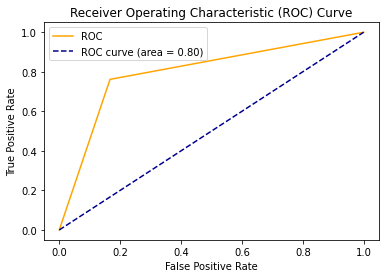

In [36]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

[0.        0.7615861 1.       ]
[0.         0.16664991 1.        ]
[2 1 0]
0.7974680910598508
Threshold value is: 1


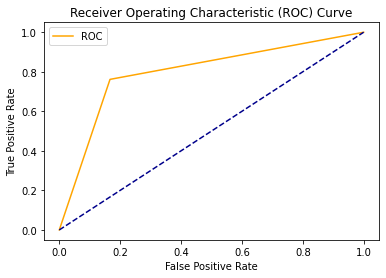

In [37]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(tpr)
print(fpr)
print(thresholds)
print(roc_auc_score(y_test, y_pred))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

In [38]:
###checking the intercept of model equation
model5.intercept_

array([-0.00333274])

In [39]:
##Checking the coefficients of model equation
model5.coef_

array([[ 1.43574076e-02, -5.07335396e-02, -2.30170854e-01,
         3.71956710e-02, -1.15948598e-02,  4.90202716e-05,
        -3.59851381e-01, -1.12786077e-01,  1.39247837e-03,
         2.98901579e-02,  5.37198521e-03, -4.40786186e-01,
        -1.21159639e-03,  2.13736030e-01, -4.51355941e-01]])

## K Neighbors Classification(Model-6)

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model6=KNeighborsClassifier()
model6.fit(X_train,y_train)

y_predict=model6.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)## Confustion matrix

0.866539752517409


col_0,0,1
y,,
0,7770,2179
1,485,9527


In [43]:
probs=model6.predict_proba(X_test)[:,1]

In [44]:
probs

array([1. , 0.8, 0.8, ..., 0. , 0. , 0.2])

In [45]:
def predict_threshold (model1,X_test,thresholds):
    return np.where(model1.predict_proba(X_test)[:,1]>thresholds,1,0)

In [46]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(model6,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[5897 4052]
 [  40 9972]]
Threshold : 0.1
[[5897 4052]
 [  40 9972]]
Threshold : 0.2
[[6874 3075]
 [ 167 9845]]
Threshold : 0.30000000000000004
[[6874 3075]
 [ 167 9845]]
Threshold : 0.4
[[7770 2179]
 [ 485 9527]]
Threshold : 0.5
[[7770 2179]
 [ 485 9527]]
Threshold : 0.6000000000000001
[[8558 1391]
 [1213 8799]]
Threshold : 0.7000000000000001
[[8558 1391]
 [1213 8799]]
Threshold : 0.8
[[9320  629]
 [3078 6934]]
Threshold : 0.9
[[9320  629]
 [3078 6934]]


In [47]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [48]:
from sklearn.metrics import roc_auc_score,roc_curve
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.93


In [49]:
##from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

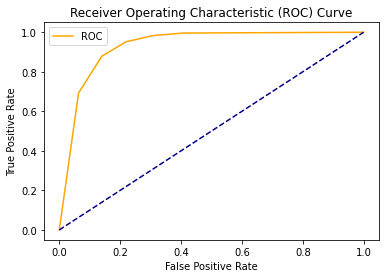

In [50]:
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)

In [ ]:
## Model 7(S.V.M)

In [15]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(X_train, y_train)

SVC()

In [24]:
y_hat=svclassifier.predict(X_test)

In [25]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7372877110365212

In [26]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      9949
           1       0.76      0.70      0.73     10012

    accuracy                           0.74     19961
   macro avg       0.74      0.74      0.74     19961
weighted avg       0.74      0.74      0.74     19961



In [27]:
f2=f1_score(y_test,y_hat)
f2

0.7268749999999999

In [29]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.         0.03065134 0.05769231]
Cross validation Score: 0.029447882896158756
Std : 0.023568154011502272


The Std is less than 0.05 so it is ok 

# Testing the Sample Data on the Model (Random Forest)

Among all algorithms, Random Forest achieved an accuracy of about 92%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.

In [49]:
from collections import Counter
print(Counter(df4.y))

Counter({0: 4000, 1: 521})


In [50]:
from sklearn.ensemble import RandomForestClassifier

model3= RandomForestClassifier(n_estimators=100)
model3.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
y_predict=model3.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      9949
           1       0.91      0.94      0.93     10012

    accuracy                           0.92     19961
   macro avg       0.92      0.92      0.92     19961
weighted avg       0.92      0.92      0.92     19961



In [53]:
## best score when compare to remaing models
f_Score=f1_score(y_test,y_predict)
f_Score

0.9251700680272109

## testing

In [54]:
## Defining X1 and y1 and creating dependent and independent variables
X1 = df4.iloc[:,:-1] ## independent variable
y1 = df4['y'] ## Dependent or target variable

In [60]:
abcd=model3.predict(X1)

In [61]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

print(classification_report(y1,abcd))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4000
           1       0.84      0.93      0.88       521

    accuracy                           0.97      4521
   macro avg       0.91      0.96      0.93      4521
weighted avg       0.97      0.97      0.97      4521



In [62]:
test_samp=f1_score(y1,abcd)

In [63]:
test_samp

0.8822463768115942

In [64]:
##cross matrix
pd.crosstab(y1,abcd)

col_0,0,1
y,,
0,3904,96
1,34,487


In [66]:
df4.shape

(4521, 16)